In [1]:
import numpy as np
import pandas as pd
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from IPython.core.display import HTML
from sklearn.tree import export_text
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
dataset = pd.read_csv('./Admission_Predict.csv')
dataset.head()

,Serial-No.,GRE-Score,TOEFL-Score,University Rating,SOP,LOR,CGPA,Research,Chance-of-Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# ищем пропуски
dataset.isna().sum()

Serial-No.           0
GRE-Score            0
TOEFL-Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance-of-Admit      0
dtype: int64

In [4]:
dataset['Enrolled'] = np.where(dataset['Chance-of-Admit'] >= 0.80, 1, 0)
dataset.drop(['Chance-of-Admit'], axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9420\3090756269.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Enrolled', data=dataset, palette='hls')


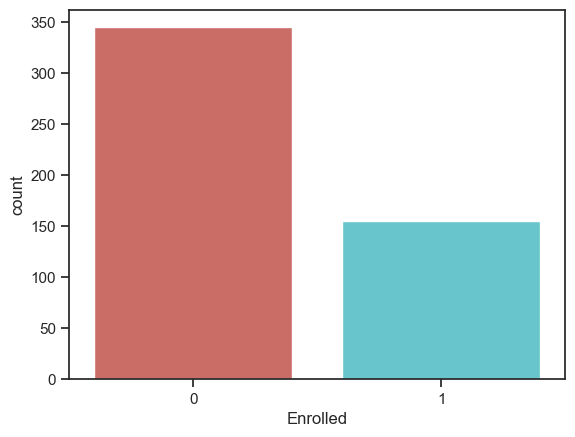

In [5]:
sns.countplot(x='Enrolled', data=dataset, palette='hls')
plt.show()

In [6]:
# разделение на объекты-признаки и целевой признак
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [7]:
# Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [8]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_test_logreg = logreg.predict(X_test)
y_pred_train_logreg = logreg.predict(X_train)
ac1 = accuracy_score(y_train, y_pred_train_logreg), accuracy_score(y_test, y_pred_test_logreg)
ac1

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9, 0.89)

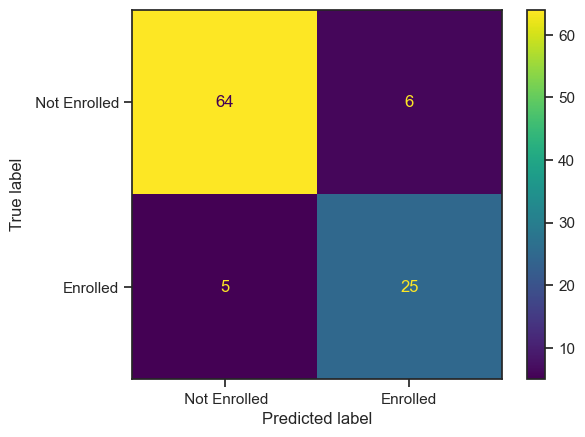

In [9]:
cm1 = confusion_matrix(y_test, y_pred_test_logreg, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[' Not Enrolled', 'Enrolled'])
disp.plot()

In [10]:
#svc = SVC(kernel='rbf') #(0.6875, 0.7)
#svc = SVC(kernel='sigmoid') #(0.6875, 0.7)
svc = SVC(kernel='poly') #(0.85, 0.88)
svc.fit(X_train, y_train)
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
ac2 = accuracy_score(y_train, y_pred_train_svc), accuracy_score(y_test, y_pred_test_svc)
ac2

(0.85, 0.88)

In [11]:
param_grid = {'degree': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'kernel':['poly']}
grid = GridSearchCV(SVC(), param_grid, verbose=2, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ..............................degree=1, kernel=poly; total time=   0.0s
[CV] END ..............................degree=1, kernel=poly; total time=   0.0s
[CV] END ..............................degree=1, kernel=poly; total time=   0.0s
[CV] END ..............................degree=1, kernel=poly; total time=   0.0s
[CV] END ..............................degree=1, kernel=poly; total time=   0.0s
[CV] END ..............................degree=2, kernel=poly; total time=   0.0s
[CV] END ..............................degree=2, kernel=poly; total time=   0.0s
[CV] END ..............................degree=2, kernel=poly; total time=   0.0s
[CV] END ..............................degree=2, kernel=poly; total time=   0.0s
[CV] END ..............................degree=2, kernel=poly; total time=   0.0s
[CV] END ..............................degree=3, kernel=poly; total time=   0.0s
[CV] END ..............................degree=3,

{'degree': 14, 'kernel': 'poly'}

In [12]:
svc = SVC(kernel='poly', degree=14)
svc.fit(X_train, y_train)
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
accuracy_score(y_train, y_pred_train_svc), accuracy_score(y_test, y_pred_test_svc)

(0.905, 0.9)

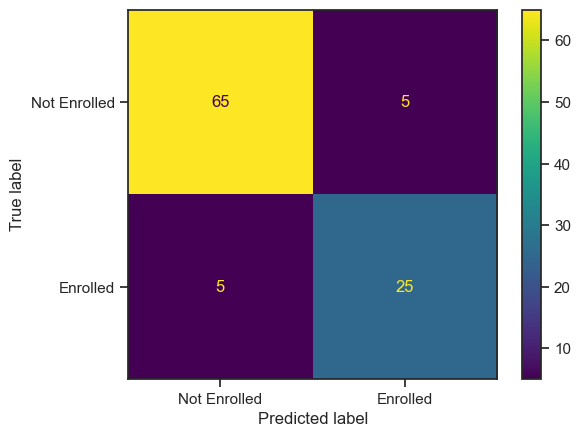

In [13]:
cm2 = confusion_matrix(y_test, y_pred_test_svc, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Not Enrolled', 'Enrolled'])
disp.plot()

In [14]:
tree = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_pred_test_tree = tree.predict(X_test)
y_pred_train_tree = tree.predict(X_train)
ac3 = accuracy_score(y_train, y_pred_train_tree), accuracy_score(y_test, y_pred_test_tree)
ac3

(1.0, 0.86)

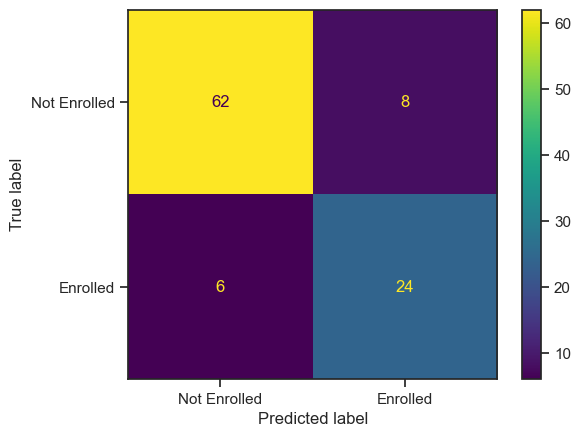

In [15]:
cm3 = confusion_matrix(y_test, y_pred_test_tree, labels = tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Not Enrolled', 'Enrolled'])
disp.plot()

In [16]:
# сравнение качества моделей по 2 метрикам
print('LogisticRegression:     ', ac1)
print('SVM:                    ', ac2)
print('DecisionTreeClassifier: ', ac3)

LogisticRegression:      (0.9, 0.89)
SVM:                     (0.85, 0.88)
DecisionTreeClassifier:  (1.0, 0.86)


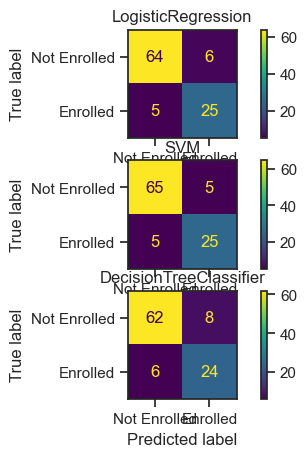

In [17]:
fig, ax = plt.subplots(3,1)
ax[0].set_title("LogisticRegression")
ax[1].set_title("SVM")
ax[2].set_title("DecisionTreeClassifier")

ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Not Enrolled', 'Enrolled']).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Not Enrolled', 'Enrolled']).plot(ax=ax[1])

ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Not Enrolled', 'Enrolled']).plot(ax=ax[2])

In [18]:
tree_rules = export_text(tree, feature_names=list(dataset.iloc[:, :-1].columns))
HTML('<pre>' + tree_rules + '</pre>')

In [19]:
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=dataset.iloc[:, :-1].columns, 
                           class_names=['Not Enrolled', 'Enrolled'], 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [20]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

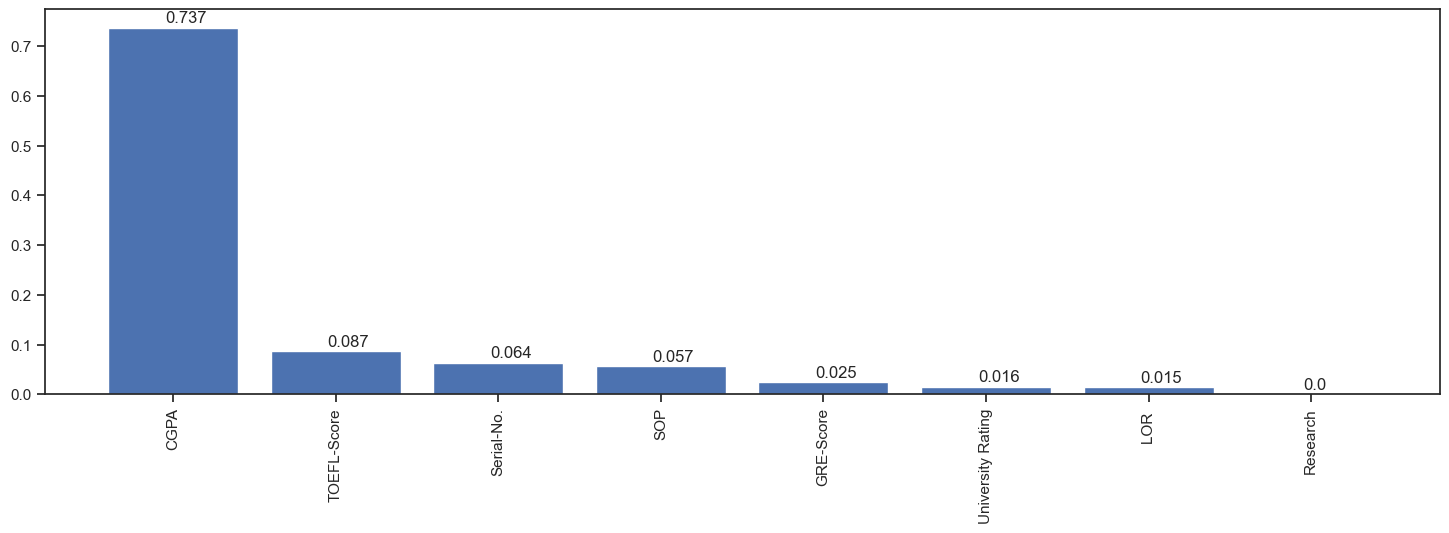

In [21]:
fl, fd = draw_feature_importances(tree, dataset.iloc[:, :-1])